In [1]:
pip install pandas matplotlib alpha_vantage

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [3]:

api_key = '35HZXTOWEAE323K0'
symbol = 'AAPL'

# Initialize the Alpha Vantage API client
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetching daily historical data
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')


In [4]:
data = data.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'})

# Sorting the DataFrame by date
data = data.sort_index(ascending=True)

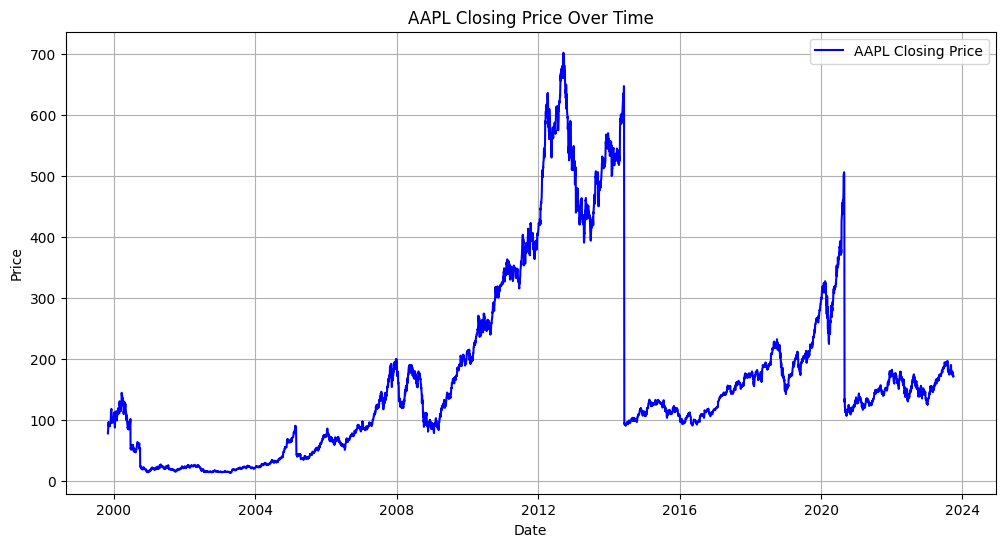

In [5]:
# Plotting the stock's closing prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label=f'{symbol} Closing Price', color='blue')
plt.title(f'{symbol} Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

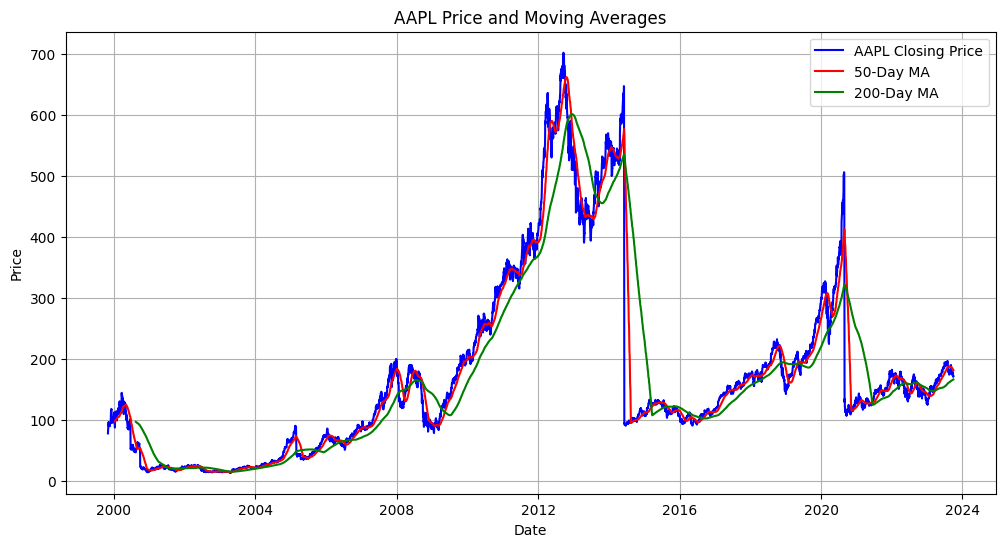

In [6]:
# Calculating daily returns
data['Daily Returns'] = data['Close'].pct_change()

# Calculating moving averages
data['50-Day MA'] = data['Close'].rolling(window=50).mean()
data['200-Day MA'] = data['Close'].rolling(window=200).mean()

# Plotting moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label=f'{symbol} Closing Price', color='blue')
plt.plot(data.index, data['50-Day MA'], label='50-Day MA', color='red')
plt.plot(data.index, data['200-Day MA'], label='200-Day MA', color='green')
plt.title(f'{symbol} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()